In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = sns.load_dataset('iris')

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
spec = dataset['species']
dataset['spec'] = spec.astype('category')

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    object  
 5   spec          150 non-null    category
dtypes: category(1), float64(4), object(1)
memory usage: 6.3+ KB


In [27]:
dataset['spec'] = dataset['spec'].cat.codes


In [28]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species,spec
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


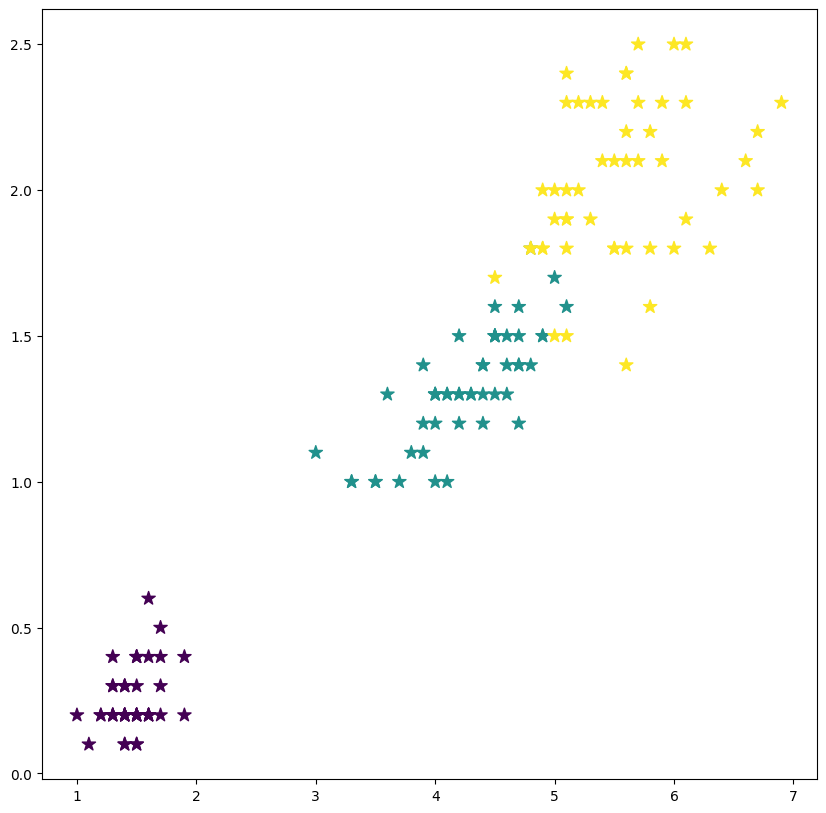

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(dataset['petal_length'], dataset['petal_width'], c=dataset['spec'], marker='*', s=100)

In [88]:
# percaktojme vlerat e X dhe y
X = dataset.drop(['species', 'spec'], axis=1)
y = dataset['species']

In [62]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=56)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [91]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred = knn5.predict(X_test)
y_pred

array(['virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica'], dtype=object)

In [73]:
# vleresojme modelin tone
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 14]], dtype=int64)

In [74]:
ac_sc= accuracy_score(y_test, y_pred)
ac_sc

0.9473684210526315

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.82      0.90        11
   virginica       0.88      1.00      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn35 = KNeighborsClassifier(n_neighbors=35)
knn35.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [77]:
y_pred = knn35.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.77      0.91      0.83        11
   virginica       0.92      0.79      0.85        14

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.89        38
weighted avg       0.90      0.89      0.90        38



In [79]:
error=[]
for i in range(1, 36):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    ypred_i = knn.predict(X_test)
    error.append(np.mean(ypred_i!=y_test))

error

[0.05263157894736842,
 0.02631578947368421,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.07894736842105263,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.02631578947368421,
 0.02631578947368421,
 0.05263157894736842,
 0.02631578947368421,
 0.0,
 0.0,
 0.02631578947368421,
 0.02631578947368421,
 0.02631578947368421,
 0.0,
 0.02631578947368421,
 0.05263157894736842,
 0.05263157894736842,
 0.07894736842105263,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684,
 0.10526315789473684]

Text(0.5, 1.0, 'Mesataret e gabimeve per cdo K te algoritmit KNN')

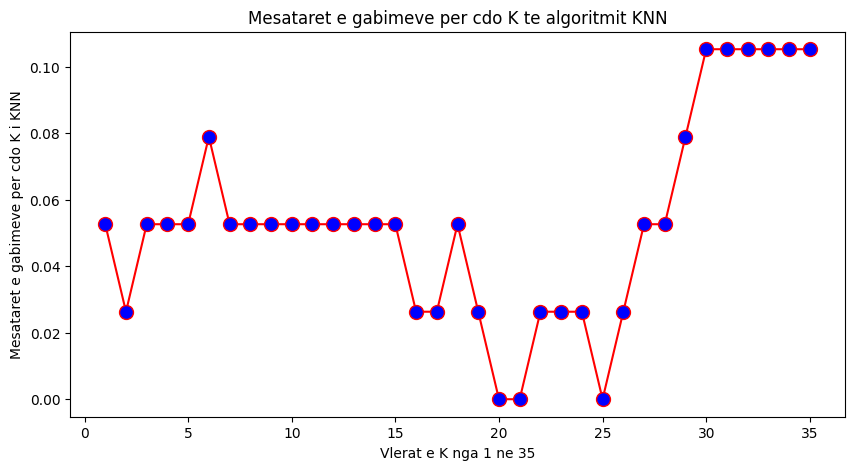

In [83]:
plt.figure(figsize=(10,5))
plt.plot(range(1,36), error, color = 'red', marker = 'o', markersize = 10, markerfacecolor = 'blue')
plt.xlabel('Vlerat e K nga 1 ne 35')
plt.ylabel('Mesataret e gabimeve per cdo K i KNN')
plt.title('Mesataret e gabimeve per cdo K te algoritmit KNN')

In [99]:
knn3 = KNeighborsClassifier(n_neighbors=2)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

In [98]:
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_train, y_train)
y_pred = knn20.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [94]:
acc=[]
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    ypred_i = knn.predict(X_test)
    acc.append(accuracy_score(y_test, ypred_i))

acc

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9210526315789473,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315]

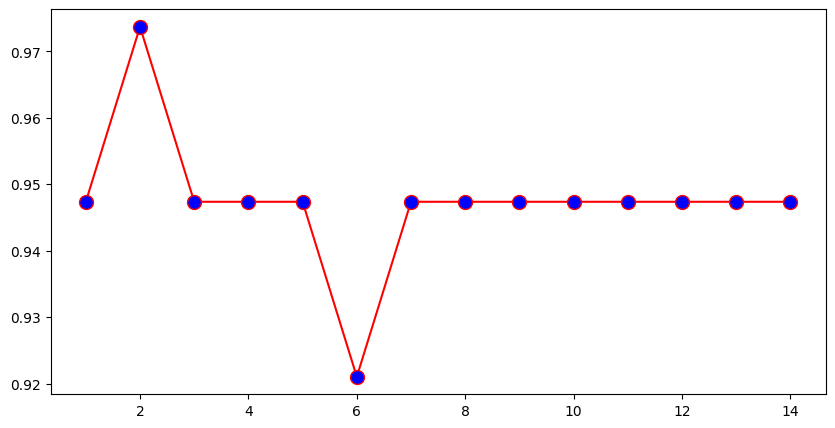

In [96]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15), acc, color = 'red', marker = 'o', markersize = 10, markerfacecolor = 'blue')
